# Overfitting and Underfitting

## Bias and Variance

**Bias**
- Bias is when a model has a tendency to make errors due to simplifying the details of the data.
- With High Bias the model is too simplistic and can't capture the true patterns and nuances in the data.
- High Bias causes Underfitting.

**Variance**
- Variance is the model's sensitivity to the details and small nuances in the **training** data.
- With High Variance the model is overly complex and fits the training data too tightly.
- High Variance causes Overfitting.

Basically, to reduce overfitting, you trade off perfection with the training data in order to get better utility with new data

For Classification

![fitting.png](https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190523171258/overfitting_2.png)

For Regression

![vb](https://miro.medium.com/v2/resize:fit:1400/1*9hPX9pAO3jqLrzt0IE3JzA.png)

**Analogy** 
- Underfitting - student didn't study well and can't answer well
- Overfitting - student cramed/memorized the text book and can only answer those questions
- Appropriate fitting - student learned the information and can apply to new situations

#### Bias-Variance Trade-Off
![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/New/Lesson_03_Introduction_To_Supervised_Learning/bias_variance_tradeoff.png)


## Addressing Overfitting and Underfitting
To address Overfitting:
- Simplify the model by reducing its complexity and noise:
    - Using fewer features
    - Focusing on the features that matter most
    - Reducing the number/intensity of hyperparameters
- Applying Regularization
- Improving data quality
- Increasing the amount of training data to get more diverse examples for the model to learn from
- Employing Cross-validation to evaluate performance based on different subsets of the data
- Using Ensemble Learning Methods

To address Underfitting:
- Increase the model's complexity by:
    - Adding more insightful features
    - Feature engineering (extraction)
    - Increasing the number/intensity of the model's hyperparameters
- Adding more relevant data points
- Reducing Regularization (penalty) level if it was applied
- Improving data quality
- Choosing a better ML algorithm 

## Exercise: Detecting and Preventing Overfitting

- Use `sklearn` data generator library to artificially produce complex data with noise.
- Use Decision Tree Classifier Model

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, make_moons #to generate the data
from sklearn.model_selection import train_test_split #to split the data
from sklearn.tree import DecisionTreeClassifier #algorithm we'll be using
from sklearn.metrics import accuracy_score #evaluation

##### Generating and Preparing The Data

In [ ]:
X, y = make_classification(n_samples=9000,  #row count
                           n_features=18,   #total feature count
                           n_informative=4, #4 useful features - actually help predict the target
                           n_redundant=12,  #12 are linear combinations of the informative ones (purely redundant, no new info)
                           random_state=2)

# Remaining: 2 features → These are called "n_noise" or "useless" features.

In [13]:
print(X[:2]) #first 2 rows of the features data

[[ 2.15631115 -1.69009525  0.85714501 -0.55237974 -1.29713357  2.41049057
   1.21394205  1.09574044 -0.27112028 -0.20828617 -0.74540214  0.15874997
  -0.12124403  0.41527157 -1.4665927   0.24655728 -2.68791625  0.21728147]
 [ 1.12057112 -0.06407922  1.04214442 -0.08316613 -1.09791873  0.90701872
  -1.22117341  1.15110676  0.4542019  -0.5555228  -0.42382371 -0.34233904
  -0.55241524  0.54362834 -1.12509168  0.46288361 -0.97242942  1.05363474]]


In [14]:
print(y[:30]) #first 30 data points of the target

[1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1]


In [15]:
# just for display purposes - unnecessary step
pd.DataFrame(np.hstack((X,y.reshape(-1,1))))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,2.156311,-1.690095,0.857145,-0.552380,-1.297134,2.410491,1.213942,1.095740,-0.271120,-0.208286,-0.745402,0.158750,-0.121244,0.415272,-1.466593,0.246557,-2.687916,0.217281,1.0
1,1.120571,-0.064079,1.042144,-0.083166,-1.097919,0.907019,-1.221173,1.151107,0.454202,-0.555523,-0.423824,-0.342339,-0.552415,0.543628,-1.125092,0.462884,-0.972429,1.053635,0.0
2,0.743577,-0.824911,-1.795087,-1.140818,0.828695,0.884580,-0.414306,-1.261001,-0.478853,1.277968,-1.249176,-0.534983,0.078454,0.668052,-0.346653,-1.544109,-0.524343,-1.727458,1.0
3,-1.435744,1.577253,0.288327,0.915041,0.309522,-1.914877,-1.998745,0.029314,0.456918,-0.461416,0.723707,-0.199109,-0.067241,0.421007,0.749434,0.289394,1.800016,0.801596,0.0
4,-0.726817,0.238554,-0.486792,0.397939,0.580280,-0.861943,0.621715,-0.525683,-0.307491,0.200192,0.247341,0.055955,0.409927,-0.822130,0.624040,-0.407364,0.605788,-0.414297,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,0.830859,1.965363,-0.665370,-0.923464,-0.110722,-0.249474,1.244931,0.057567,1.497159,0.336089,-1.929889,-2.391172,-1.664827,0.535802,-1.652897,-1.149231,1.137957,0.788071,0.0
8996,0.480028,0.653986,0.835577,-0.966696,-0.749638,0.829746,0.204524,0.719419,1.301058,-0.452328,-0.107936,-0.236334,-1.297658,0.563042,-0.718714,1.249289,0.411169,1.128434,1.0
8997,1.802209,0.189373,-1.071166,-1.460649,-0.137728,1.274105,0.092904,-0.212706,0.635148,0.831388,-2.243735,-1.804862,-1.117498,1.931215,-1.859241,-1.484289,-0.583424,-0.325051,1.0
8998,0.809492,-0.189572,0.125969,-0.080578,-0.407116,0.522411,-1.027597,0.372593,0.014116,-0.012773,-0.613109,-0.443309,-0.160150,0.739815,-0.750670,-0.352771,-0.741542,0.185788,0.0


In [16]:
# split the data into train and test with 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

##### Training The Model
 
- We'll be using **Decision Tree Classifier**
- About:
    - **Decision Tree** a very popular Supervised Learning algorithm. Can be used for both **Classification** and **Regression** ML problems.
    - It creates a tree-like model where each internal node represents a feature or attribute
    - Each branch represents a decision rule and each leaf node represents a class label
    - The algorithm evaluates each *feature* and threshold *combination* to find the ones that best seperate the data into distinct classes and branches
- For this exercise, we'll be controlling the complexity of the model using a hyperparameter called `max_depth`

Example for Heart Failure Risk data break down
 
![dtc](https://images.datacamp.com/image/upload/v1677504957/decision_tree_for_heart_attack_prevention_2140bd762d.png)

**Example of a decision tree structure**

![dt2](https://eloquentarduino.github.io/wp-content/uploads/2020/08/DecisionTree.png)

![dt](https://miro.medium.com/v2/resize:fit:1358/0*LE5dtoUiXduhrad1)

**Objective For This Demo**
1. Start the training from a low level of complexity. Then, increase it gradually using a hyperparameter called `max_depth`. This will help show the spectrum between underfitting and overfitting
2. Store the results of both train and test data's prediction accuracy
3. Plot the difference between train and test and spot underfitting and overfitting

This can be achieved using a for loop:
1. Pick a range of depth values (e.g. 20 levels)
2. Define "i" value based on increasing depth
3. Fit (train) the model for X_train
4. Predict the model for X_train and X_test
5. Calculate accuracy for both train and test
6. Append the values into a list
7. Plot the comparison between train and test  

In [17]:
# create 2 blank lists
train_scores, test_scores = list(), list()

# define a range of values for max depth - 20 levels
values = range(1,21)
list(values)

#build the loop

for i in values:
    #define my model with dynamic max_depth
    DTC = DecisionTreeClassifier(max_depth=i)
    #train or fit the model on the training dataset
    DTC.fit(X_train, y_train)
    #run prediction for the train data and calculate accuracy
    y_hat_train = DTC.predict(X_train)
    train_accu = accuracy_score(y_train, y_hat_train)

    #run prediction for the test data and calculate accuracy
    y_hat_test = DTC.predict(X_test)
    test_accu = accuracy_score(y_test, y_hat_test)

    #append the calculated values into the empty lists
    train_scores.append(train_accu)
    test_scores.append(test_accu)

    #print out results
    print(f'max_depth={i} \t| train score:{train_accu:.3f} \t| test score:{test_accu:.3f}')



max_depth=1 	| train score:0.668 	| test score:0.668
max_depth=2 	| train score:0.710 	| test score:0.693
max_depth=3 	| train score:0.796 	| test score:0.781
max_depth=4 	| train score:0.846 	| test score:0.838
max_depth=5 	| train score:0.869 	| test score:0.851
max_depth=6 	| train score:0.900 	| test score:0.873
max_depth=7 	| train score:0.917 	| test score:0.878
max_depth=8 	| train score:0.934 	| test score:0.881
max_depth=9 	| train score:0.946 	| test score:0.887
max_depth=10 	| train score:0.959 	| test score:0.880
max_depth=11 	| train score:0.967 	| test score:0.880
max_depth=12 	| train score:0.976 	| test score:0.875
max_depth=13 	| train score:0.982 	| test score:0.879
max_depth=14 	| train score:0.986 	| test score:0.864
max_depth=15 	| train score:0.990 	| test score:0.867
max_depth=16 	| train score:0.993 	| test score:0.873
max_depth=17 	| train score:0.996 	| test score:0.864
max_depth=18 	| train score:0.997 	| test score:0.869
max_depth=19 	| train score:0.998 	| 

In [18]:
plt.style.use('ggplot')

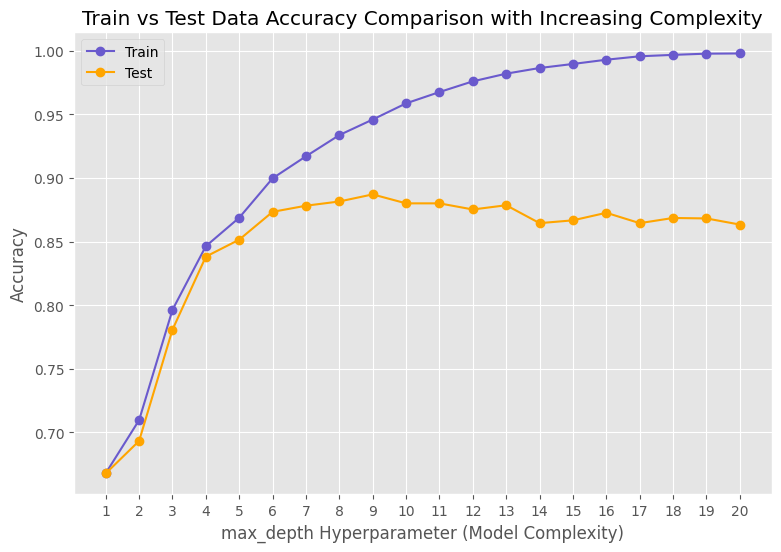

In [19]:
# plot the results above for a better interpretation
plt.figure(figsize=(9,6))
plt.plot(values, train_scores, '-o', label='Train', color='slateblue')
plt.plot(values, test_scores, '-o', label='Test', color='orange')

plt.title('Train vs Test Data Accuracy Comparison with Increasing Complexity')
plt.ylabel('Accuracy')
plt.xlabel('max_depth Hyperparameter (Model Complexity)')
plt.xticks(values)
plt.legend()

**Observations**
- As the `max_depth` increases the accuracy of the test data plateaus then starts to decrease
- The range for underfitting is between 1 and 3 (less complexity and low accuracy score for both train and test)
- The range for overfitting is between 7 and 10 (high complexity and low accuracy score for test and high for train)
- The **optimal** range is between 4 to 7

### Testing with a different dataset

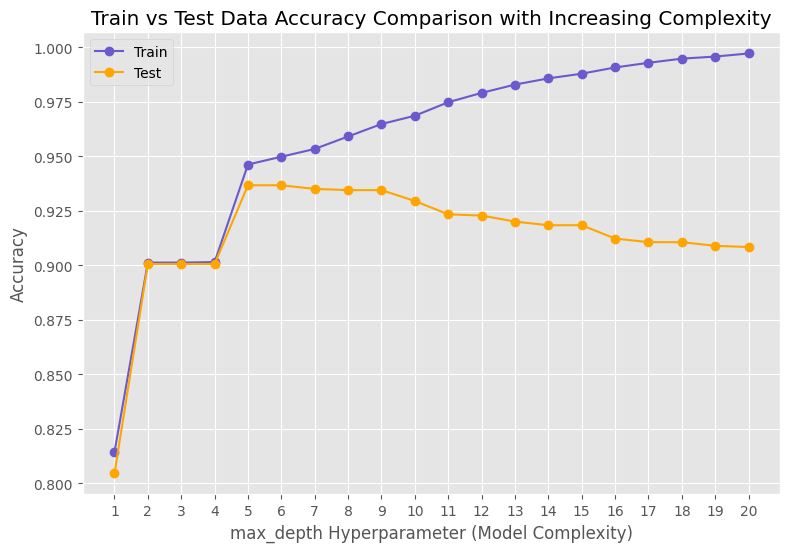

In [22]:
X, y = make_moons(n_samples=6000, noise=0.25, random_state=42)
# split the data into train and test with 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# create 2 blank lists
train_scores, test_scores = list(), list()

# define a range of values for max depth - 20 levels
values = range(1,21)
list(values)

#build the loop

for i in values:
    #define my model with dynamic max_depth
    DTC = DecisionTreeClassifier(max_depth=i)
    #train or fit the model on the training dataset
    DTC.fit(X_train, y_train)
    #run prediction for the train data and calculate accuracy
    y_hat_train = DTC.predict(X_train)
    train_accu = accuracy_score(y_train, y_hat_train)

    #run prediction for the test data and calculate accuracy
    y_hat_test = DTC.predict(X_test)
    test_accu = accuracy_score(y_test, y_hat_test)

    #append the calculated values into the empty lists
    train_scores.append(train_accu)
    test_scores.append(test_accu)



# plot the results above for a better interpretation
plt.figure(figsize=(9,6))
plt.plot(values, train_scores, '-o', label='Train', color='slateblue')
plt.plot(values, test_scores, '-o', label='Test', color='orange')

plt.title('Train vs Test Data Accuracy Comparison with Increasing Complexity')
plt.ylabel('Accuracy')
plt.xlabel('max_depth Hyperparameter (Model Complexity)')
plt.xticks(values)
plt.legend()


## Hyperparameter Tuning Using GridSearchCV

- **Hyperparameters** parameters or knobs in the ML algorithm that are set by the user before training begins and dictate the complexity and variation of the ML algorithm.
- **Hyperparameter Tuning** is the process of finding the best **hyperparameters** settings for an ML model. It is done by trying different values and evaluating the model's performance.
- **Cross Validation**:
    - is an important concept in ML. It involves partitioning the dataset into multiple subsets (folds e.g 5 folds) then training and evaluating the model accuracy multiple times (5 times in our example) each time using a different fold.
    - It helps provide a more reliable estimate of the model's performance by reducing the variance associated with a single train-test-split.

![cv](https://www.mathworks.com/discovery/cross-validation/_jcr_content/mainParsys/image.adapt.full.medium.jpg/1718274806179.jpg)

> We'll be performing both **Hyperparameter Tuning** & **Cross-Validation** using `GridSearchCV`

- There's a dedicated function for performing cross-validation only
- However, it's recommended to perform cross-validation with hyperparameter tuning all in one functionality called `GridSearchCV`
- Possible Hyperparameters for our model:
```python
class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
```

In [12]:
# define your parameter grid as a dictionary
param_grid = {
                'criterion':['gini', 'entropy'],
                'max_depth' : [2,4,6,10,20],
                'min_samples_split' : [2, 5, 10, 15, 20]
            }

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
GS_DTC = GridSearchCV(DecisionTreeClassifier(), #call the model function without parameters
                      param_grid, #specify the custom hyperparameter grid
                      scoring='accuracy', #specify the scoring metric to determine the best configuration
                      cv=5 # the number of cross validations
                      )

In [15]:
# train the model
GS_DTC.fit(X_train, y_train) #dtc_gs.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 10, 20],
                         'min_samples_split': [2, 5, 10, 15, 20]},
             scoring='accuracy')

How many trials/iterations did `GridSearchCV` do? </br>
Answer: 2 x 5 x 5 (hyperparameters) x 5 (cross-validation) = **250**

Now we can ask `GridSearchCV` what the best hyperparameter settings are.

In [16]:
GS_DTC.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}

The hyperparameter settings above are the best based on accuracy score.

In [19]:
GS_DTC.best_score_

0.8874603174603175

The hyperparameters above give 88.7% accuracy score

In [20]:
# get the predicted results from the best estimator with hyperparameters
y_test_hat = GS_DTC.best_estimator_.predict(X_test)

In [21]:
#evaluate 
accuracy_score(y_test, y_test_hat)

0.8807407407407407

Get the full analysis report (hyperparamter tuning)

In [22]:
pd.DataFrame(GS_DTC.cv_results_).head(7) 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018365,0.003102,0.000997,0.000650,gini,2,2,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.723810,0.701587,0.700000,0.692063,0.710317,0.705556,0.010812,46
1,0.016034,0.000542,0.000681,0.000130,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.723810,0.701587,0.700000,0.692063,0.710317,0.705556,0.010812,46
2,0.017379,0.001405,0.000637,0.000071,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.723810,0.701587,0.700000,0.692063,0.710317,0.705556,0.010812,46
3,0.023531,0.011673,0.000631,0.000078,gini,2,15,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.723810,0.701587,0.700000,0.692063,0.710317,0.705556,0.010812,46
4,0.016339,0.000984,0.000599,0.000062,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.723810,0.701587,0.700000,0.692063,0.710317,0.705556,0.010812,46
5,0.030042,0.001163,0.000620,0.000100,gini,4,2,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.834127,0.817460,0.825397,0.826984,0.831746,0.827143,0.005776,34
6,0.052031,0.031493,0.001516,0.001015,gini,4,5,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.834127,0.818254,0.825397,0.826984,0.831746,0.827302,0.005512,31


Recommendation for `GridSearchCV`
- Select the most common hyperparamters for the ML algorithm (usually it's the first 4-5 mentioned in the documentation)
- For each hyperparameter, start with a wide range of values
- On the first run, GSC will give you the best value
- Then, perform a second attempt with ranges around the recommended values

Visualize the process of the decision tree

In [23]:
from sklearn import tree

tree_view = tree.export_text(GS_DTC.best_estimator_)
print(tree_view)

|--- feature_9 <= 0.67
|   |--- feature_16 <= -0.72
|   |   |--- feature_15 <= 0.67
|   |   |   |--- feature_9 <= -0.66
|   |   |   |   |--- feature_16 <= -1.73
|   |   |   |   |   |--- feature_6 <= 0.79
|   |   |   |   |   |   |--- feature_3 <= -0.42
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_3 >  -0.42
|   |   |   |   |   |   |   |--- feature_2 <= 2.20
|   |   |   |   |   |   |   |   |--- feature_7 <= 1.54
|   |   |   |   |   |   |   |   |   |--- feature_1 <= -0.98
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_1 >  -0.98
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_7 >  1.54
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_2 >  2.20
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_6 >  0.79
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_16 >  -1.73


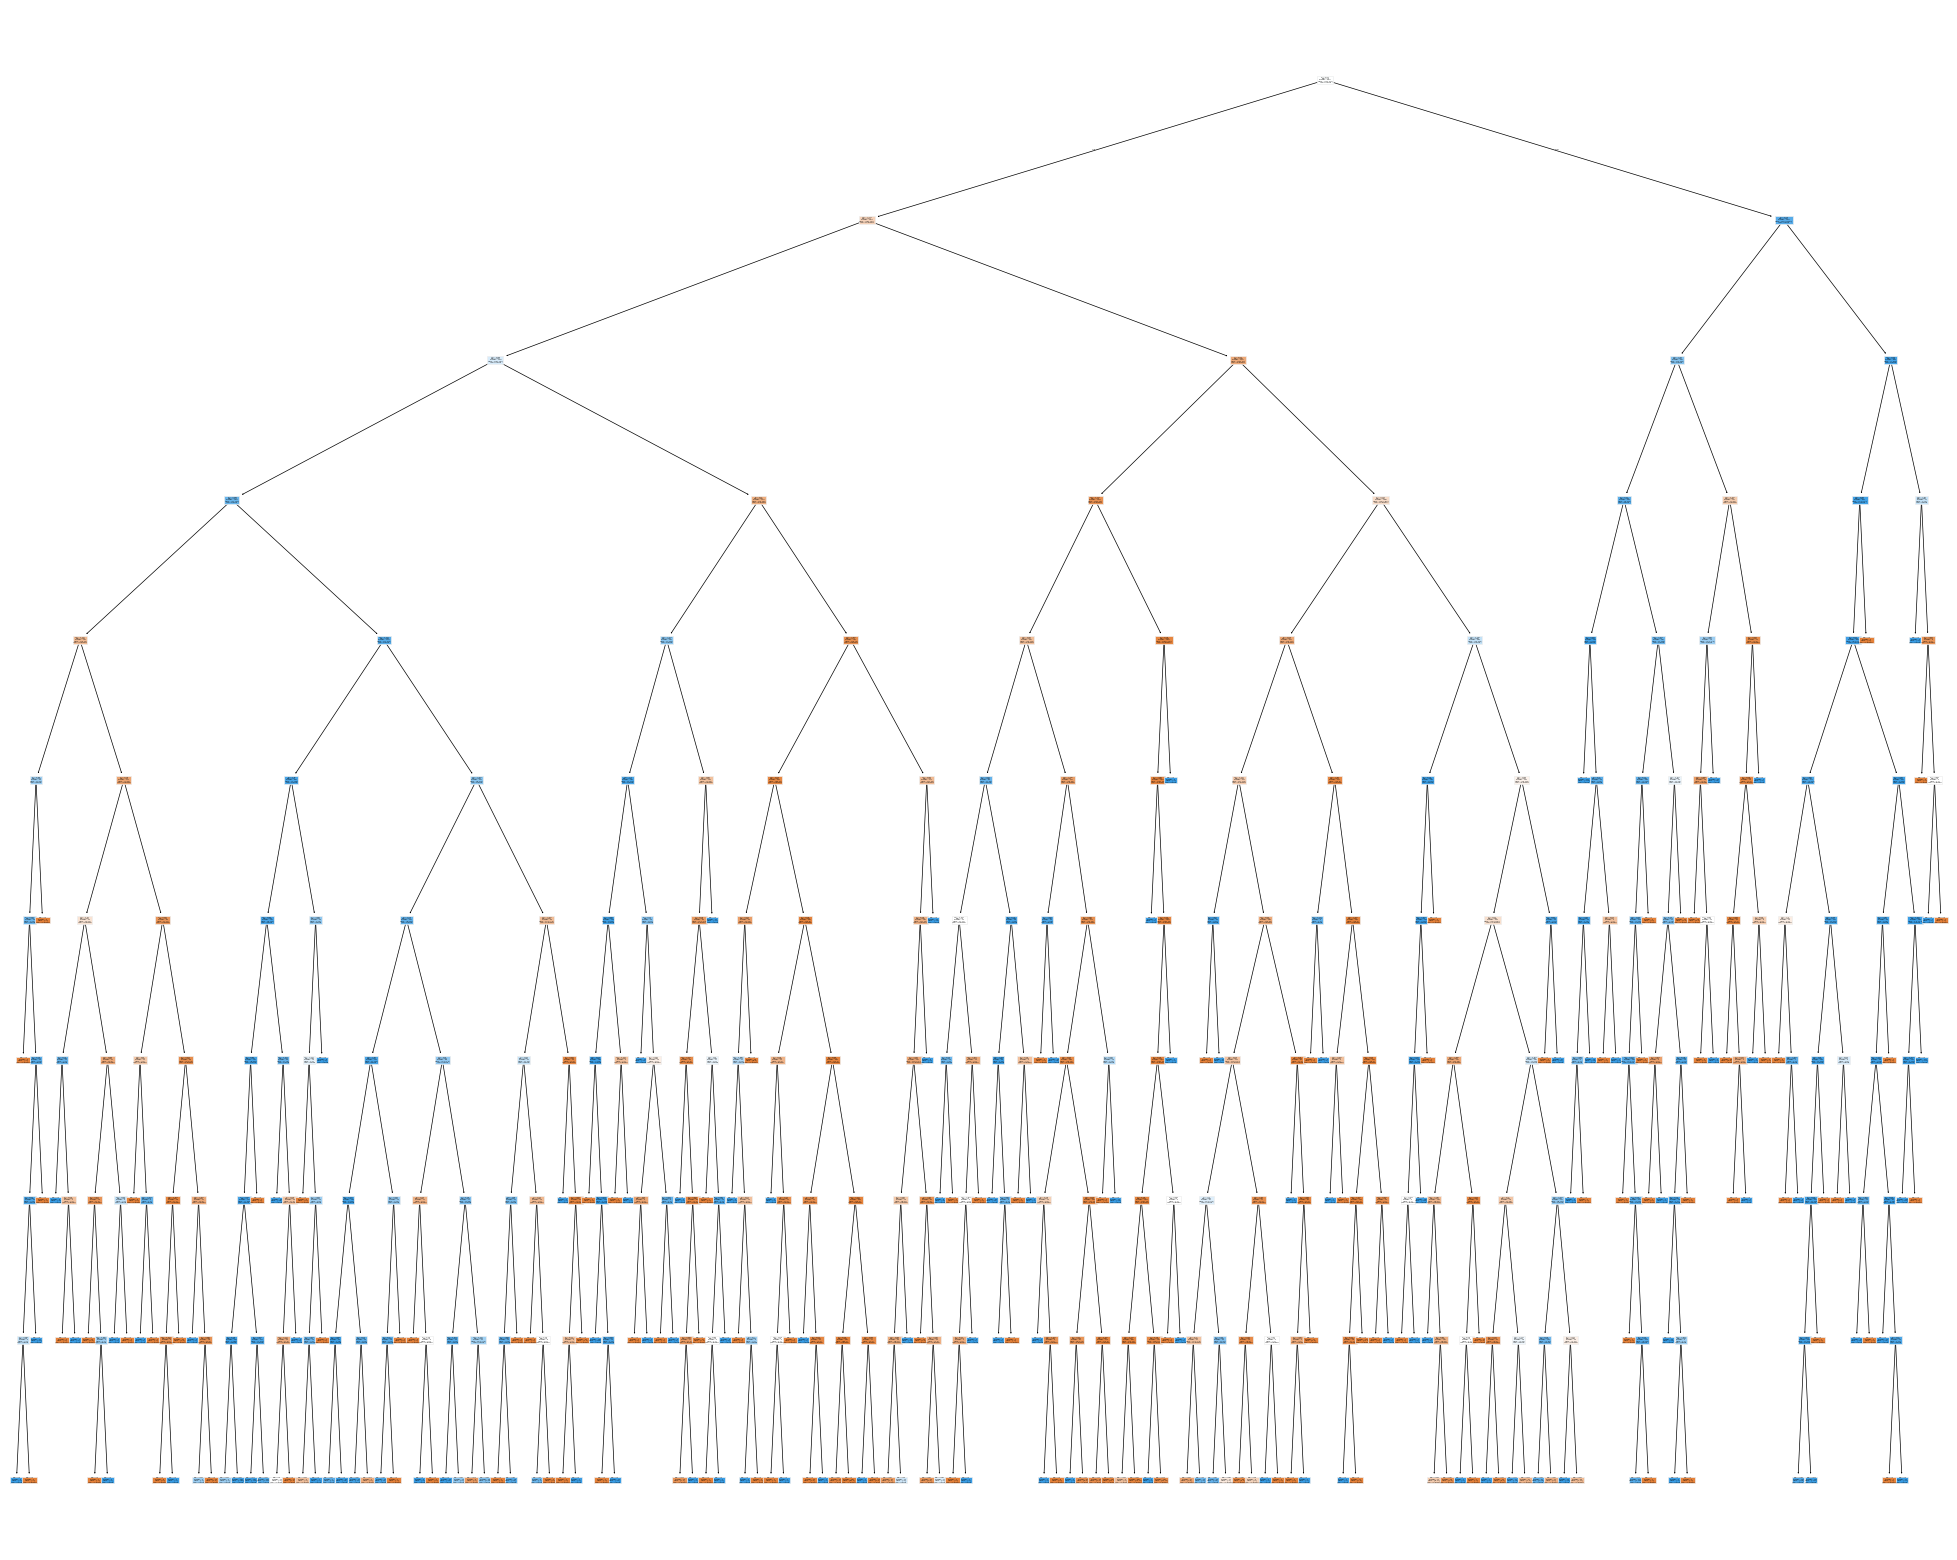

In [27]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(GS_DTC.best_estimator_,
                   feature_names=range(X.shape[1]),
                   class_names=['No Disease', "Disease"],
                   filled=True)